# Feature Selection & Dimensionality Reduction - Simritha R 

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
# reading the file
data = pd.read_csv('product_dataset.csv')

In [3]:
# first 5 rows of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Variable Identification and Typecasting

In [4]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
# shape of the data
data.shape

(550068, 12)

In [6]:
# Converting variables into category datatype
data['Marital_Status'] = data['Marital_Status'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')

### Missing Values

In [7]:
# percentage of missing values in each variable
data.isnull().sum()/len(data)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

#### Product_Category_2 and Product_Category_3 have more than 30% of missing values

In [8]:
# imputing missing values in Product_Category_2 andProduct_Category_3 with the median of the variable
data['Product_Category_2'].fillna(data['Product_Category_2'].median(), inplace=True)
data['Product_Category_3'].fillna(data['Product_Category_3'].median(), inplace=True)

### Descriptive Analysis of Target Variable

In [9]:
# Description on Purchase
data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

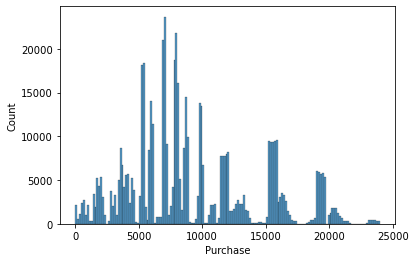

In [10]:
sns.histplot(data.Purchase)

In [11]:
data.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

### Univariate Analysis

In [12]:
# Custom function for visualisation of Categorical Variables
def UVA_category(data, var_group):
    
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

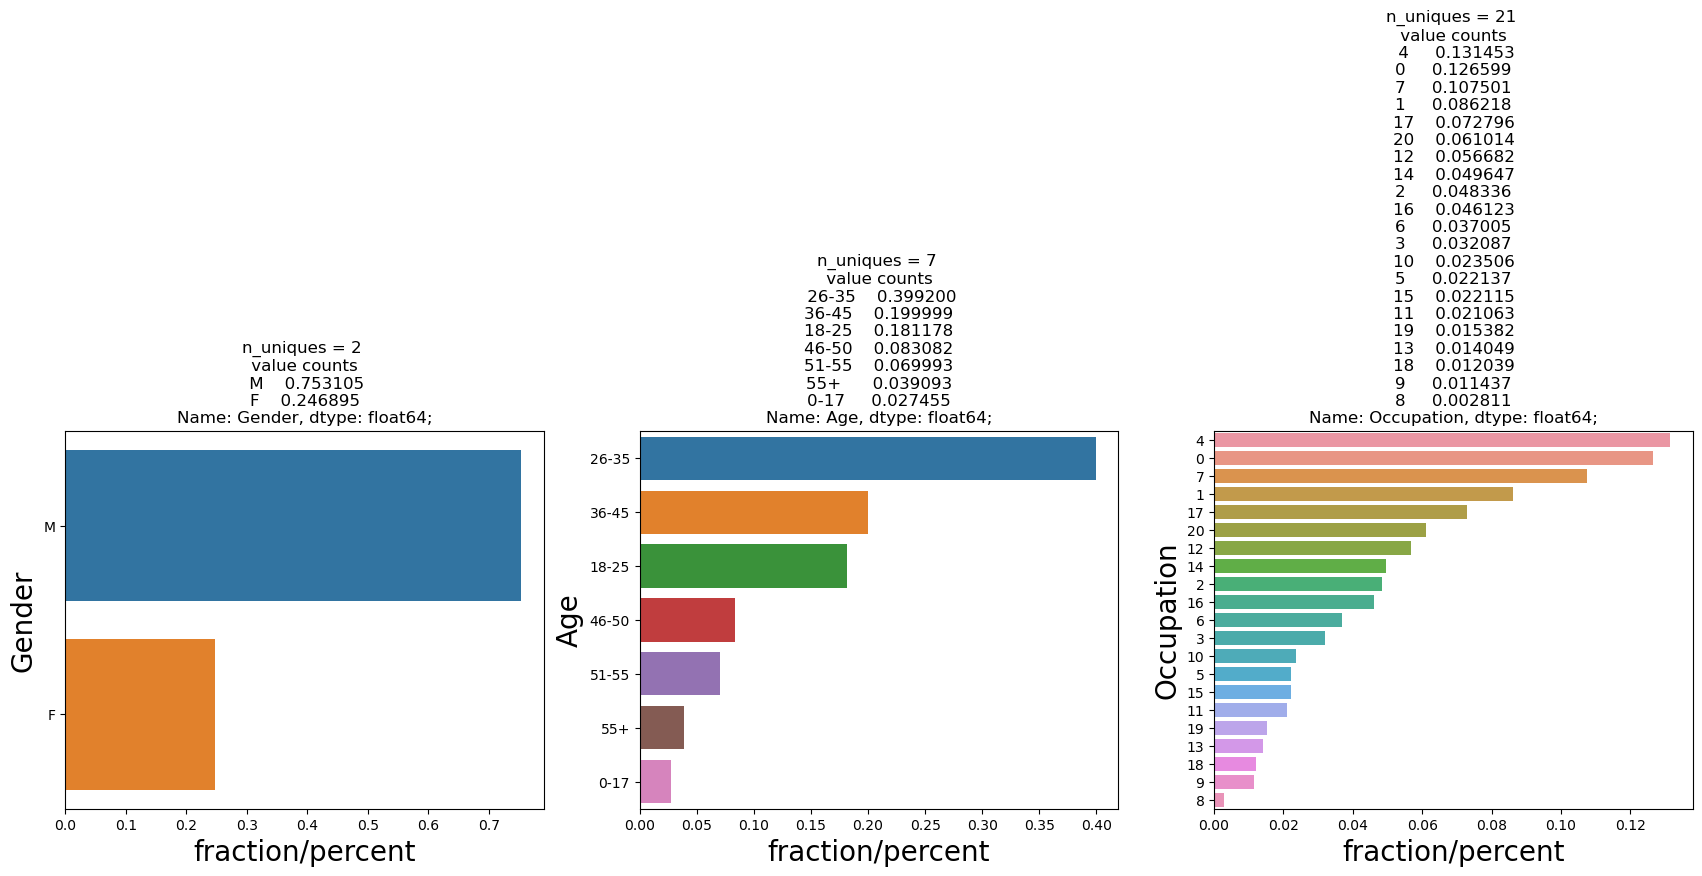

In [13]:
UVA_category(data, ['Gender','Age','Occupation'])

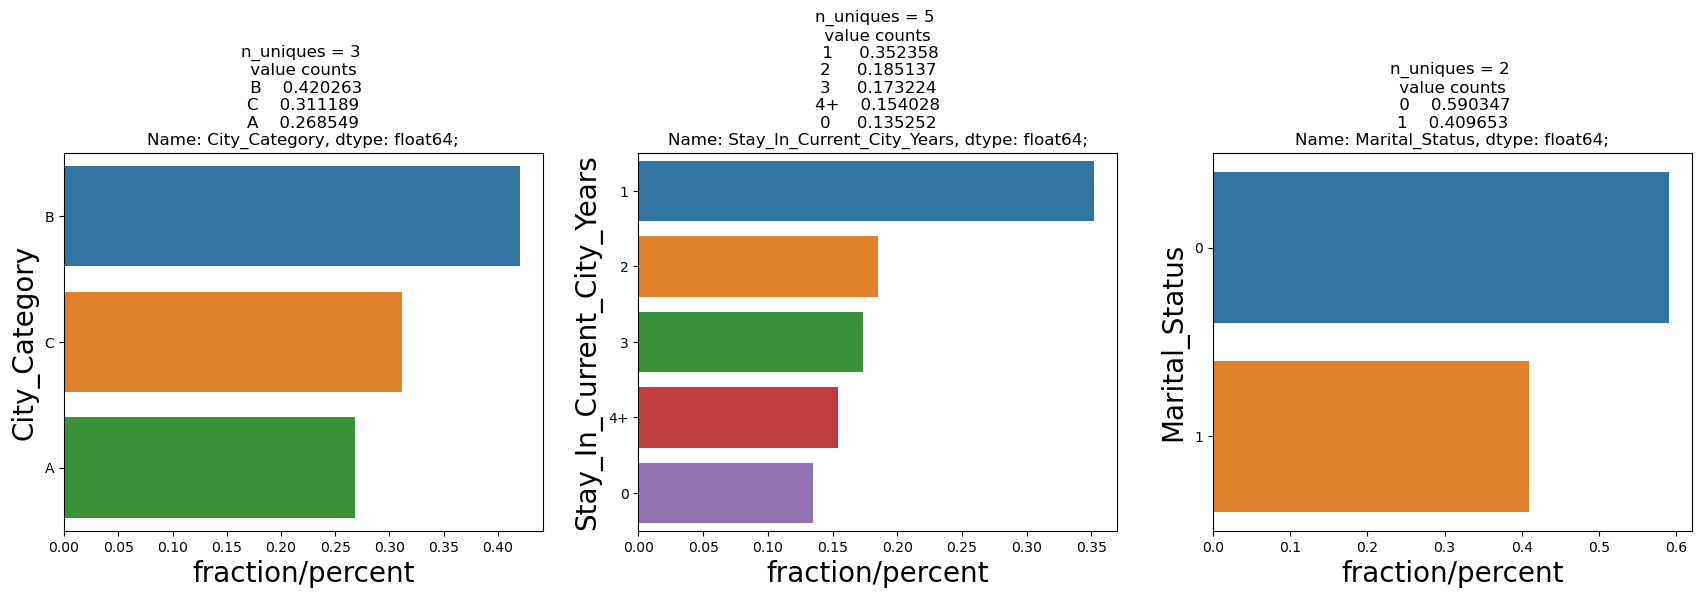

In [14]:
UVA_category(data, ['City_Category','Stay_In_Current_City_Years','Marital_Status'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='Count'>

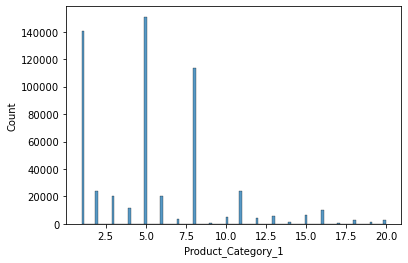

In [15]:
sns.histplot(data.Product_Category_1)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Count'>

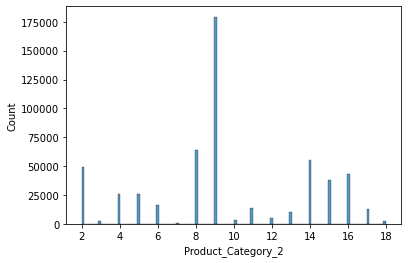

In [16]:
sns.histplot(data.Product_Category_2)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Count'>

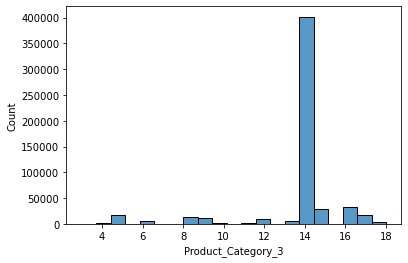

In [17]:
sns.histplot(data.Product_Category_3)

### Bivariate Analysis

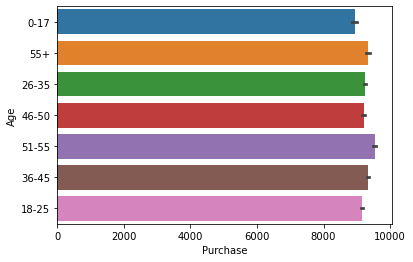

In [18]:
sns.barplot(x = 'Purchase',y = 'Age',data = data)
plt.show()

* Age group 51-55 seem to have purchased the most among the others

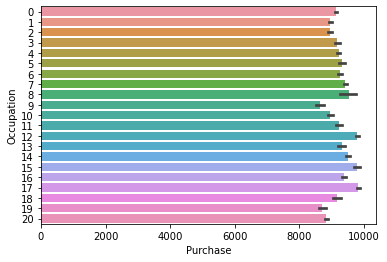

In [19]:
sns.barplot(x = 'Purchase',y = 'Occupation',data = data)
plt.show()

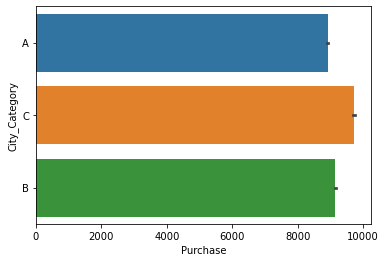

In [20]:
sns.barplot(x ='Purchase',y ='City_Category',data = data)
plt.show()

* City category c has the most purchase amount

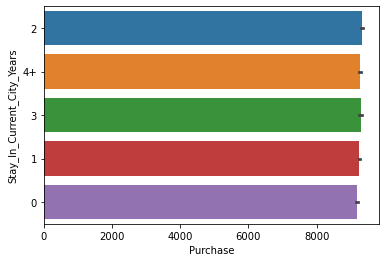

In [21]:
sns.barplot(x ='Purchase',y ='Stay_In_Current_City_Years',data = data)
plt.show()

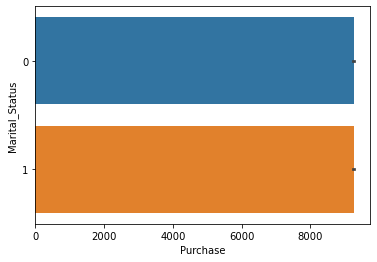

In [22]:
sns.barplot(x ='Purchase',y ='Marital_Status',data = data)
plt.show()

## CORRELATION MATRIX

In [23]:
# dropping the targer variable
df = data.drop('Purchase',axis=1)

In [24]:
# calculalting the correlation between independent variables
df.corr()

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,0.003825,0.001644,0.001008
Product_Category_1,0.003825,1.000000,0.331691,0.195930
Product_Category_2,0.001644,0.331691,1.000000,0.416680
Product_Category_3,0.001008,0.195930,0.416680,1.000000


In [25]:
# creating correlation matrix with abso;ute values
corr_matrix = df.corr().abs()

In [26]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,NaN,0.003825,0.001644,0.001008
Product_Category_1,NaN,NaN,0.331691,0.195930
Product_Category_2,NaN,NaN,NaN,0.416680
Product_Category_3,NaN,NaN,NaN,NaN


In [27]:
# finding index of variables with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.4)]

In [28]:
to_drop

['Product_Category_3']

In [29]:
# dropping the variable
data = data.drop(data[to_drop], axis=1)

#### Product_Category_3 is the most correlated factor in the dataset

## COVARIANCE MATRIX

In [30]:
# dropping identifier variables
data = data.drop('Product_ID',axis=1)
data = data.drop('User_ID',axis=1)

In [31]:
data['Gender'] = data['Gender'].map({'M': 0,'F': 1})

In [32]:
data['City_Category'] = data['City_Category'].map({'A': 1,'B': 2,'C': 3})

In [33]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0,'1': 1,'2': 2,'3': 3,'4+': 4})

In [34]:
data['Age'] = data['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})

In [35]:
# dropping the target variable
newdata = data.drop('Purchase', axis = 1)

In [36]:
# calculating covariance matrix
cov_Matrix = newdata.cov().abs()

In [37]:
cov_Matrix

,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
Gender,0.185938,0.002488,0.001480,0.008151,0.077388,0.025604
Age,0.002488,1.832319,0.126654,0.008225,0.326069,0.248859
City_Category,0.001480,0.126654,0.577920,0.019552,0.042982,0.022129
Stay_In_Current_City_Years,0.008151,0.008225,0.019552,1.662662,0.021384,0.005922
Product_Category_1,0.077388,0.326069,0.042982,0.021384,15.493760,5.517531
Product_Category_2,0.025604,0.248859,0.022129,0.005922,5.517531,17.859289


### EIGEN VALUES AND EIGEN VECTORS

In [38]:
# Calcuating the eigen values and eigen vectors of covariance matrix
from numpy.linalg import eig
values,vectors=eig(cov_Matrix)

In [39]:
values

array([22.32748171, 11.03490803,  0.18549927,  0.56493691,  1.66245302,
        1.83660891])

In [40]:
vectors

array([[-3.09893893e-03, -4.06465706e-03,  9.99968300e-01,
         2.72492846e-03, -5.41049380e-03, -7.58266686e-04],
       [-1.94555394e-02, -1.05667343e-02, -2.78577146e-04,
        -9.91872352e-02,  5.68347183e-02, -9.93197591e-01],
       [-2.14767102e-03, -1.99560078e-03, -2.86318983e-03,
         9.94919659e-01, -1.13598049e-02, -9.99451606e-02],
       [-8.84309858e-04, -1.39326858e-03, -5.40561882e-03,
        -1.69836561e-02, -9.98303945e-01, -5.53971628e-02],
       [-6.28667648e-01, -7.77381205e-01, -5.08725666e-03,
        -8.45238733e-04,  5.34971924e-04,  2.07019309e-02],
       [-7.77421040e-01,  6.28923176e-01,  1.48828340e-04,
         4.25676307e-04, -6.66428724e-04,  8.45686930e-03]])

In [41]:
# sorting eigen values
sorted_values = np.sort(values)
sorted_values

array([ 0.18549927,  0.56493691,  1.66245302,  1.83660891, 11.03490803,
       22.32748171])

In [42]:
# calulating sum of eigen values
sum_evalue = sorted_values.sum()

In [43]:
# each eigen value divded by 'sum_evalue'
percentage_evalue = sorted_values/sum_evalue*100

In [44]:
# Creating a dataframe with eigen values
e_values = pd.DataFrame(data = percentage_evalue, index = ['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years','Product_Category_1','Product_Category_2'])

### PRINCIPAL COMPONENTS

In [45]:
e_values

,0
Gender,0.493193
Age,1.502017
City_Category,4.420020
Stay_In_Current_City_Years,4.883054
Product_Category_1,29.338884
Product_Category_2,59.362832


#### Product_Category_1 and Product_Category_2 are the Principal components beacuse they preserve the maximum variance.

## PRINCIPAL COMPONENT ANALYSIS

In [46]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,1,10,1,2,0,3,9.0,8370
1,1,1,10,1,2,0,1,6.0,15200
2,1,1,10,1,2,0,12,9.0,1422
3,1,1,10,1,2,0,12,14.0,1057
4,0,7,16,3,4,0,8,9.0,7969


In [47]:
data.shape

(550068, 9)

In [48]:
data.dtypes

Gender                           int64
Age                              int64
Occupation                    category
City_Category                    int64
Stay_In_Current_City_Years       int64
Marital_Status                category
Product_Category_1               int64
Product_Category_2             float64
Purchase                         int64
dtype: object

In [49]:
data.shape

(550068, 9)

In [50]:
int16 = data[['Age','Marital_Status', 'Product_Category_1', 'Occupation','Purchase','Gender','City_Category']].astype('int16')
float16  = data[['Stay_In_Current_City_Years','Product_Category_2']].astype('float16')
data = pd.concat([int16, float16], axis=1, join="inner")

In [51]:
data.dtypes

Age                             int16
Marital_Status                  int16
Product_Category_1              int16
Occupation                      int16
Purchase                        int16
Gender                          int16
City_Category                   int16
Stay_In_Current_City_Years    float16
Product_Category_2            float16
dtype: object

In [52]:
# creating target dataset
x = data.drop(['Purchase'], axis=1)
y = data['Purchase']
x.shape, y.shape

((550068, 8), (550068,))

In [53]:
data.isnull().sum()

Age                           0
Marital_Status                0
Product_Category_1            0
Occupation                    0
Purchase                      0
Gender                        0
City_Category                 0
Stay_In_Current_City_Years    0
Product_Category_2            0
dtype: int64

In [54]:
# Standardise the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [55]:
# creating the training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(x_scaled, y, random_state = 10, test_size = 0.25)

In [56]:
# creating the random forest regression model
model = RandomForestRegressor(random_state=1, max_depth=3, n_estimators=100)

In [57]:
# fitting on the training data with 8 features
pca = PCA(8).fit(X_train)

# transform both training and validation data
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [58]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed,y_train)

RandomForestRegressor(max_depth=3, random_state=1)

In [59]:
# predicting for the transformed validation set
pred = model.predict(X_valid_transformed)

In [60]:
# checking the training performance (root mean squared error)
print(np.sqrt(mean_squared_error(model.predict(X_train_transformed), y_train)))

4618.775992468486


In [61]:
# checking the validation performance (root mean squared error)
print(np.sqrt(mean_squared_error(pred, y_valid)))

4618.576203314698


In [64]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8'])

In [65]:
principalDf.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-895.473328,1.871989,-2.122631,-1.845334,-2.570657,-0.060827,0.786884,0.048776
1,5936.224121,1.687997,-3.948124,-0.805059,-2.578233,-0.070669,0.849615,0.040625
2,-7833.376465,2.072176,1.099439,4.584178,-2.723080,-0.053018,0.722082,0.049814
3,-8206.844727,2.104055,5.155274,1.729384,-2.762326,-0.056050,0.715051,0.047699
4,-1294.669067,8.041831,0.676124,2.352072,3.139722,2.327712,-0.582474,0.848034
